<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정 - XGBRegressor]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [82]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from xgboost import cv, DMatrix, train
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [83]:
# 데이터 로드
train_data = pd.read_csv('data/training/merged_data/no_map_merge.csv', encoding='UTF-8')
test_data = pd.read_csv('data/validation/merged_data/no_map_merge_validation.csv', encoding='UTF-8')

In [84]:
print(train_data.isnull().sum())

GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON                    0
TRAVEL_D

In [85]:
print(test_data.isnull().sum())

GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON                    0
TRAVEL_D

In [86]:
# 데이터 살펴보기
train_data.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON,TOTAL_WON,TRAVEL_DURATION,SEASON
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00","81,700.00",2,Summer
1,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00","81,700.00",2,Summer
2,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",2,"71,700.00","81,700.00",2,Summer
3,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",4,"71,700.00","81,700.00",2,Summer
4,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",5,"71,700.00","81,700.00",2,Summer


<hr>
<h2>[Regression위한 전처리 - XGBRegressor]</h2>
<ul>
<li>XGBRegressor 선택 이유 : 연속형 변수를 예측하기에 적합하므로 고객의 소비 금액을 예측하는데 사용하기로 결정함</li>

1. TRAVEL_ID를 기준으로 그룹화 및 요약 진행

In [87]:
# TRAVEL_ID 기준으로 그룹화 및 요약
grouped_train = train_data.groupby('TRAVEL_ID').agg({
    # object 타입
    'GENDER': lambda x: x.mode()[0],  
    'TRAVEL_STATUS_RESIDENCE': lambda x: x.mode()[0],
    'TRAVEL_STATUS_DESTINATION': lambda x: x.mode()[0],
    'TRAVEL_STATUS_ACCOMPANY': lambda x: x.mode()[0],
    'REL_CD': lambda x: list(x.unique()),  
    'COMPANION_GENDER': lambda x: list(x.unique()),  
    'COMPANION_AGE_GRP': lambda x: list(x.unique()),  
    'TRAVEL_PURPOSE': lambda x: ', '.join(x.unique()),  
    'TRAVEL_START_YMD': 'min',  
    'TRAVEL_END_YMD': 'max',  
    'TRAVEL_MISSION_CHECK': lambda x: ', '.join(x.unique()),  
    'SEASON': lambda x: x.mode()[0],  

    # int 또는 float 타입
    'AGE_GRP': lambda x: x.mode()[0],  
    'JOB_NM': lambda x: x.mode()[0],
    'TRAVEL_TERM': 'mean',
    'TRAVEL_LIKE_SGG_1': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_2': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_3': lambda x: x.mode()[0],
    'TRAVEL_STYL_1': lambda x: x.mode()[0],
    'TRAVEL_STYL_2': lambda x: x.mode()[0],
    'TRAVEL_MOTIVE': lambda x: x.mode()[0],
    'TRAVEL_COMPANIONS_NUM': 'mean', 
    'TOTAL_MVMN_WON': 'mean', 
    'TOTAL_ACTIVITY_WON': 'mean',  
    'TOTAL_WON': 'mean',  
    'TRAVEL_DURATION': 'mean',  
}).reset_index()

# 결과 확인
print(grouped_train.head())


   TRAVEL_ID GENDER TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY           REL_CD COMPANION_GENDER     COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  SEASON  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION
0  e_e000005      여                   대전광역시                        인천                2인 가족 여행            [1.0]            [1.0]                 [4.0]         5;2;23       2023-04-29     2023-05-03               5;2;23  Spring       30       3         2.00              44180              50130              50110              4              1              7                   1.00      112,300.00          413,500.00 525,800.00             4.00
1  e_e000043      남                    충청북도                        경기                  나홀로 여행             [없음]

In [88]:
# 리스트를 문자열로 변환
columns_to_convert = ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']
for col in columns_to_convert:
    grouped_train[col] = grouped_train[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [89]:
# TRAVEL_ID 기준으로 그룹화 및 요약
grouped_test = test_data.groupby('TRAVEL_ID').agg({
    'GENDER': lambda x: x.mode()[0],  
    'TRAVEL_STATUS_RESIDENCE': lambda x: x.mode()[0],
    'TRAVEL_STATUS_DESTINATION': lambda x: x.mode()[0],
    'TRAVEL_STATUS_ACCOMPANY': lambda x: x.mode()[0],
    'REL_CD': lambda x: list(x.unique()),  
    'COMPANION_GENDER': lambda x: list(x.unique()),  
    'COMPANION_AGE_GRP': lambda x: list(x.unique()),  
    'TRAVEL_PURPOSE': lambda x: ', '.join(x.unique()),  
    'TRAVEL_START_YMD': 'min',  
    'TRAVEL_END_YMD': 'max',  
    'TRAVEL_MISSION_CHECK': lambda x: ', '.join(x.unique()),  
    'SEASON': lambda x: x.mode()[0],  
    'AGE_GRP': lambda x: x.mode()[0],  
    'JOB_NM': lambda x: x.mode()[0],
    'TRAVEL_TERM': 'mean',
    'TRAVEL_LIKE_SGG_1': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_2': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_3': lambda x: x.mode()[0],
    'TRAVEL_STYL_1': lambda x: x.mode()[0],
    'TRAVEL_STYL_2': lambda x: x.mode()[0],
    'TRAVEL_MOTIVE': lambda x: x.mode()[0],
    'TRAVEL_COMPANIONS_NUM': 'mean', 
    'TOTAL_MVMN_WON': 'mean', 
    'TOTAL_ACTIVITY_WON': 'mean',  
    'TOTAL_WON': 'mean',  
    'TRAVEL_DURATION': 'mean',  
}).reset_index()

# 결과 확인
print(grouped_test.head())


   TRAVEL_ID GENDER TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY      REL_CD COMPANION_GENDER COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  SEASON  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION
0  e_e000821      남                     경기도                        충남          3인 이상 여행(가족 외)  [1.0, 7.0]       [2.0, 1.0]             [4.0]     1;2;21;4;8       2023-05-27     2023-05-29              21;4;22  Spring       40       3         2.00              42150              50110              44180              2              3              2                   6.00       50,000.00          150,500.00 200,500.00             2.00
1  e_e013180      남                     경기도                        충남                자녀 동반 여행  [2.0, 1.0]       [2.0, 1.0]      

In [90]:
# 리스트를 문자열로 변환
for col in columns_to_convert:
    grouped_test[col] = grouped_test[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [91]:
# TRAVEL_ID 중복 여부 확인
duplicates = grouped_train[grouped_train.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [92]:
# TRAVEL_ID 중복 여부 확인
duplicates = grouped_test[grouped_test.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


<hr>
<h2>[분석 과정 - XGBRegressor]</h2>
<ul>
<li>XGBRegressor 선택 이유 : 연속형 변수를 예측하기에 적합하므로 고객의 소비 금액을 예측하는데 사용하기로 결정함</li>

2. Feature 및 Target 변수 정의

In [93]:
# Feature와 Target 설정
classification_features = ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP', 'GENDER', 'AGE_GRP', 'JOB_NM', 'TRAVEL_TERM', 
                           'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 
                           'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_MOTIVE', 'TRAVEL_COMPANIONS_NUM', 
                           'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TRAVEL_DURATION', 'SEASON', ]

X_train = grouped_train[classification_features]
y_train = grouped_train['TOTAL_WON']

X_test = grouped_test[classification_features]
y_test = grouped_test['TOTAL_WON']

In [94]:
# 출력 설정 변경 (최대 행 수 확장)
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력 (추가 옵션)

# 클래스별 샘플 수 확인
print("훈련 데이터 클래스 분포:")
print(y_train.value_counts())

print("\n테스트 데이터 클래스 분포:")
print(y_test.value_counts())

훈련 데이터 클래스 분포:
TOTAL_WON
198,000.00      4
64,000.00       4
86,100.00       4
125,000.00      4
184,200.00      4
147,300.00      4
115,000.00      4
95,000.00       4
128,600.00      3
98,500.00       3
74,000.00       3
99,500.00       3
146,300.00      3
121,400.00      3
103,500.00      3
96,000.00       3
92,700.00       3
142,700.00      3
193,900.00      3
56,600.00       3
89,500.00       3
155,000.00      3
165,400.00      3
123,000.00      3
200,000.00      3
90,100.00       3
79,600.00       3
88,300.00       3
83,000.00       3
186,500.00      3
74,900.00       3
103,400.00      3
80,000.00       3
213,900.00      3
114,100.00      3
141,500.00      3
36,000.00       3
83,400.00       3
270,700.00      3
59,800.00       3
86,000.00       3
36,300.00       3
164,400.00      3
104,000.00      3
82,300.00       3
75,100.00       3
65,000.00       3
202,000.00      3
140,500.00      3
224,900.00      3
74,500.00       3
147,100.00      3
134,000.00      3
72,500.00       3
133

In [95]:
# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(pd.concat([X_train, X_test], axis=0))

# X_train, X_test 인코딩
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# 하이퍼파라미터 범위 설정
param_distributions = {
    'max_depth': [3, 5, 10],
    'learning_rate': np.linspace(0.01, 0.1, 5),  # 0.01 ~ 0.1 사이 5개 값
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'n_estimators': [50, 100, 200]
}

# XGBRegressor 생성
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    seed=42
)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=20,                      # 랜덤 탐색 횟수
    scoring='neg_mean_squared_error',  # MSE가 낮을수록 좋음
    cv=3,                           # 교차 검증 폴드 수
    verbose=1,                      # 학습 과정 출력
    n_jobs=-1,                      # 병렬 처리
    random_state=42                 # 재현성을 위한 시드값
)

# RandomizedSearchCV 학습
print("Starting hyperparameter tuning...")
random_search.fit(X_train_encoded, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (neg_mean_squared_error):", random_search.best_score_)

# 최적의 파라미터로 모델 재학습
best_xgb_model = random_search.best_estimator_

# 테스트 데이터 예측
y_pred = best_xgb_model.predict(X_test_encoded)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05500000000000001, 'colsample_bytree': 0.7}
Best CV Score (neg_mean_squared_error): -14676249420.29741
Mean Squared Error: 11273698470.767782
Root Mean Squared Error: 106177.67406930603
R2 Score: 0.49720744344504075


In [96]:
# # One-Hot Encoding
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoder.fit(pd.concat([X_train, X_test], axis=0))

# # X_train, X_test 인코딩
# X_train_encoded = encoder.transform(X_train)
# X_test_encoded = encoder.transform(X_test)

# # DMatrix로 변환
# dtrain = DMatrix(data=X_train_encoded, label=y_train)  # X_train과 y_train을 DMatrix로 변환
# dtest = DMatrix(data=X_test_encoded, label=y_test)    # X_test와 y_test를 DMatrix로 변환

# # 하이퍼파라미터 후보 설정
# param_grid = {
#     'objective': 'reg:squarederror',
#     'max_depth': [3, 5, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.7, 0.8, 1],
#     'colsample_bytree': [0.7, 0.8, 1],
#     'seed': 42
# }

# # 최적의 하이퍼파라미터 저장 변수
# best_params = None
# best_cv_score = float('inf')  # MSE는 낮을수록 좋음

# # 하이퍼파라미터 최적화
# for max_depth in param_grid['max_depth']:
#     for learning_rate in param_grid['learning_rate']:
#         for subsample in param_grid['subsample']:
#             for colsample_bytree in param_grid['colsample_bytree']:
#                 params = {
#                     'objective': param_grid['objective'],
#                     'max_depth': max_depth,
#                     'learning_rate': learning_rate,
#                     'subsample': subsample,
#                     'colsample_bytree': colsample_bytree,
#                     'seed': param_grid['seed']
#                 }
                
#                 # XGBoost 내장 CV 실행
#                 cv_results = cv(
#                     params=params,
#                     dtrain=dtrain,
#                     num_boost_round=200,
#                     nfold=3,
#                     metrics='rmse',
#                     early_stopping_rounds=10,
#                     as_pandas=True,
#                     seed=42
#                 )

#                 # 최적의 RMSE와 파라미터 업데이트
#                 mean_cv_score = cv_results['test-rmse-mean'].min()
#                 if mean_cv_score < best_cv_score:
#                     best_cv_score = mean_cv_score
#                     best_params = params

# print("Best Parameters:", best_params)
# print("Best CV RMSE:", best_cv_score)

# # 최적의 부스팅 라운드로 최종 모델 학습
# final_model = train(
#     params=best_params,
#     dtrain=dtrain,
#     num_boost_round=cv_results.shape[0]
# )

# # 테스트 데이터 예측
# y_pred = final_model.predict(dtest)

# # 성능 평가
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse ** 0.5
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("R2 Score:", r2)

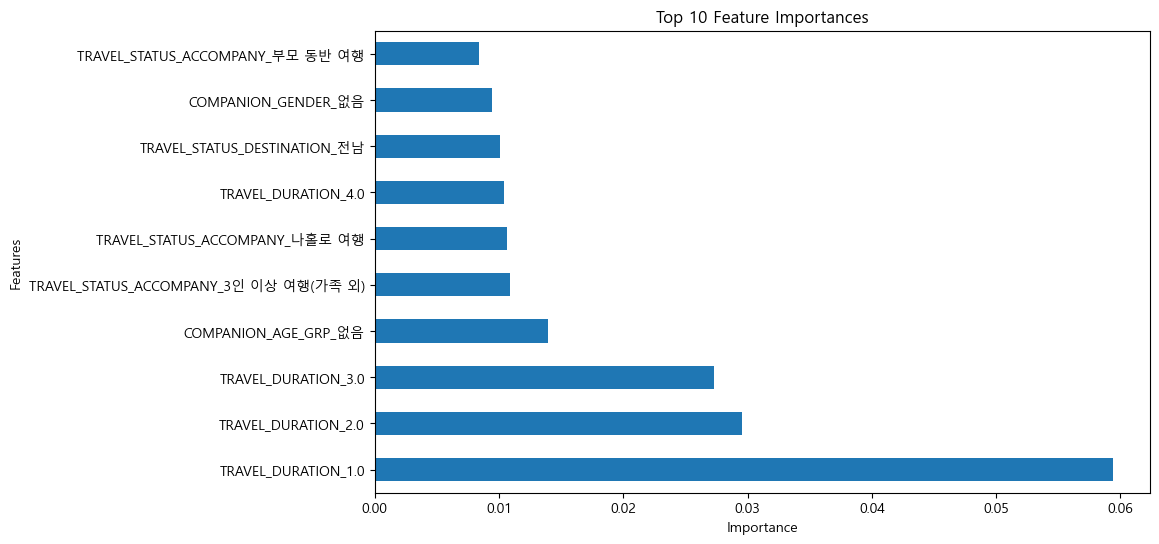

In [97]:
# Feature 중요도 추출 및 시각화
feature_importances = pd.Series(
    best_xgb_model.feature_importances_,
    index=encoder.get_feature_names_out()  # One-Hot Encoding된 Feature 이름
)

# 중요도가 높은 상위 10개 Feature 시각화
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

> 중요도 시각화 : 이건,, 별 의미 없어 보여서 일단 넣어놓긴 했는데 최종 보고서에 안 넣는게 좋을 것 같음!!

<hr>
<h2>[분석 결과 - XGBRegressor]</h2>
<ul>

1. 소비 구간 비율
<ul>
<li>여행객의 소비 금액이 어느 구간에 집중되어 있는지 파악 가능</li>
<li>전반적으로 어떤 금액대의 상품을 기획해야 하는지 파악 가능 </li>
<li>어느 구간의 여행객을 확대해야 하고, 그러기 위해서 어떤 상품을 기획할지 결정 가능</li>

In [98]:
# 최소값, 최대값, Q1, Median, Q3 계산
spending_summary = {
    "Min": y_test.min(),                # 최소값
    "Q1 (25%)": y_test.quantile(0.25),  # 1st Quartile
    "Median (50%)": y_test.median(),    # 중앙값
    "Q3 (75%)": y_test.quantile(0.75),  # 3rd Quartile
    "Max": y_test.max()                 # 최대값
}

# 결과 출력
for key, value in spending_summary.items():
    print(f"{key}: {value:,.2f}")


Min: 8,900.00
Q1 (25%): 105,850.00
Median (50%): 163,913.00
Q3 (75%): 274,500.00
Max: 986,430.00


> 분석 결과 : 
>1) 최소값과 최대값의 범위가 매우 넓으므로 Boxplot으로 범위를 나누는 것은 부적절함 -> 다른 대안 선택

In [99]:
# 소비 금액 데이터를 기준으로 구간 나누기
bins = [0, 105850, 134881, 219206, 274500, float('inf')]  # Low, Medium, High의 기준 값 (Min, Q3 등 활용)
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']       # 각 구간의 이름
spending_categories = pd.cut(y_test, bins=bins, labels=labels, right=False)

# 소비 구간 비율 계산
category_counts = spending_categories.value_counts()  # 각 구간의 개수
category_proportion = (category_counts / len(y_test)) * 100  # 비율(%)

# 결과 출력
print("소비 구간 비율 (%):")
print(category_proportion.to_frame(name="proportion"))

print("\n소비 구간 개수:")
print(category_counts.to_frame(name="count"))

소비 구간 비율 (%):
           proportion
TOTAL_WON            
Medium          29.11
Very High       25.34
Very Low        25.00
Low             13.70
High             6.85

소비 구간 개수:
           count
TOTAL_WON       
Medium        85
Very High     74
Very Low      73
Low           40
High          20


> 분석 결과 : 
>1) 이거 정해야 되는거~!

2. 지역별 평균 예측 소비 금액
<ul>
<li>어느 지역에서 소비가 많이 일어날지 예측 가능</li>
<li>소비 금액이 낮은 지역은 방문객의 소비를 증대시킬 방안 필요</li>

In [100]:
# 지역별 평균 소비 금액
grouped_test['Predicted_Spending'] = y_pred  # 예측값 추가
region_spending = grouped_test.groupby('TRAVEL_STATUS_DESTINATION')['Predicted_Spending'].mean().sort_values(ascending=False)
print("\n지역별 평균 예측 소비 금액:\n", region_spending)


지역별 평균 예측 소비 금액:
 TRAVEL_STATUS_DESTINATION
전남   232,769.53
광주   220,049.86
충북   218,039.19
전북   205,271.16
충남   202,439.39
대전   184,777.84
세종   121,351.57
Name: Predicted_Spending, dtype: float32


> 분석 결과 : 
>1) 소비 금액이 높은 지역은 전남, 광주, 충북
>2) 소비 금액이 낮은 지역은 대전, 세종

3. 시즌별 평균 소비 금액
<ul>
<li>활발한 시즌과 비수기 시즌을 분리하여 각각의 전략을 세울 수 있음</li>

In [101]:
# 시즌별 평균 소비 금액
season_spending = grouped_test.groupby('SEASON')['Predicted_Spending'].mean().sort_values(ascending=False)
print("\n시즌별 평균 예측 소비 금액:\n", season_spending)


시즌별 평균 예측 소비 금액:
 SEASON
Spring   278,586.97
Summer   220,763.00
Autumn   140,222.75
Name: Predicted_Spending, dtype: float32


> 분석 결과 : 
>1) 봄에 소비 금액이 매우 높음
>2) 두번째로는 여름철 소비 금액이 높음
>3) 가을 소비 금액이 매우 낮음
> -> 군집화 결과에서는 여름 선택이 매우 높았는데, 오히려 소비 금액은 봄이 더 많다는 것을 확인할 수 있음